In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from scipy.signal import find_peaks
import pandas as pd
files = "_u0.03_M1.1_st600_N1000_v0.2_alg0_0.csv"

In [2]:
resultI = pd.read_csv("Result/Ind_inf"+files)

resultI

Unnamed: 0  Generation  Cell tag  \
0                0         0.0         0   
1                1         0.0        10   
2                2         0.0        20   
3                3         0.0        30   
4                4         0.0        40   
...            ...         ...       ...   
499995      499995      4999.0       950   
499996      499996      4999.0       960   
499997      499997      4999.0       970   
499998      499998      4999.0       980   
499999      499999      4999.0       990   

                                 Expresion and repression  \
0       [1.12, 1.3, 95, 1.6, 0.03, 0.2, 2.49, 2, 0.472...   
1       [1.12, 1.3, 95, 1.6, 0.03, 0.2, 2.49, 2, 0.472...   
2       [1.12, 1.3, 95, 1.6, 0.03, 0.2, 2.49, 2, 0.472...   
3       [1.12, 1.3, 95, 1.6, 0.03, 0.2, 2.49, 2, 0.472...   
4       [1.12, 1.3, 95, 1.6, 0.03, 0.2, 2.49, 2, 0.472...   
...                                                   ...   
499995  [9.18236260e-01 1.31272389e+00 1.05612953e+02 ...   
499996  [9.18236260e-01 1.31272389e+00 1.05612953e+02 ...   
499997  [9.18236260e-01 1.31272389e+00 1.05612953e+02 ...   
499998  [9.18236260e-01 1.31272389e+00 1.05612953e+02 ...   
499999  [8.61200817e-01 1.38688733e+00 9.86519586e+01 ...   

        Constant of light rate  \
0                     0.100000   
1                     0.100000   
2                     0.100000   
3                     0.100000   
4                     0.100000   
...                        ...   
499995                0.075937   
499996                0.075937   
499997                0.075937   
499998                0.075937   
499999                0.075937   

                                    Disociation Constants  \
0            [0.03, 0.29, 0.049, 4.86, 1.99, 0.17, 0.019]   
1            [0.03, 0.29, 0.049, 4.86, 1.99, 0.17, 0.019]   
2            [0.03, 0.29, 0.049, 4.86, 1.99, 0.17, 0.019]   
3            [0.03, 0.29, 0.049, 4.86, 1.99, 0.17, 0.019]   
4            [0.03, 0.29, 0.049, 4.86, 1.99, 0.17, 0.019]   
...                                                   ...   
499995  [0.0271708  0.31949015 0.04372374 4.63129806 5...   
499996  [0.0271708  0.31949015 0.04372374 4.63129806 5...   
499997  [0.0271708  0.31949015 0.04576967 4.63129806 3...   
499998  [0.0271708  0.31949015 0.04372374 4.63129806 5...   
499999  [0.03080352 0.30444857 0.04217321 4.56403485 4...   

                                           Hill exponents   Fitness  \
0                                      [2, 1.9, 2.8, 2.5]  0.109742   
1                                      [2, 1.9, 2.8, 2.5]  0.109742   
2                                      [2, 1.9, 2.8, 2.5]  0.109742   
3                                      [2, 1.9, 2.8, 2.5]  0.109742   
4                                      [2, 1.9, 2.8, 2.5]  0.109742   
...                                                   ...       ...   
499995  [ 2.17683511  1.807283   11.71635064  2.62063422]  0.023188   
499996  [ 2.17683511  1.807283   11.71635064  2.62063422]  0.023188   
499997  [ 2.55490639  1.807283   10.0698232   2.52307395]  0.041572   
499998  [ 2.17683511  1.807283   11.71635064  2.62063422]  0.023188   
499999  [ 2.72310622  2.09146022 10.55459905  2.50549497]  0.055110   

                                        WCCn  \
0       [0.1235 0.169  0.2084 0.2446 0.2774]   
1       [0.1235 0.169  0.2084 0.2446 0.2774]   
2       [0.1235 0.169  0.2084 0.2446 0.2774]   
3       [0.1235 0.169  0.2084 0.2446 0.2774]   
4       [0.1235 0.169  0.2084 0.2446 0.2774]   
...                                      ...   
499995  [0.1685 0.143  0.1248 0.1109 0.0998]   
499996  [0.1685 0.143  0.1248 0.1109 0.0998]   
499997  [2.0176 2.087  2.1609 2.2381 2.3179]   
499998  [0.1685 0.143  0.1248 0.1109 0.0998]   
499999  [3.178  3.2701 3.3332 3.3286 3.1857]   

                                                     Time  Parent tag  
0                              [0.   0.51 1.   1.51 2.01]           0  
1                             

In [29]:
rW = np.array(resultI["WCCn"])
rT = np.array(resultI["Time"])
count=[]
for i in range(len(rW)):
    try:
        rW[i]=list(np.array(np.mat(rW[i]))[0])
        rT[i]=list(np.array(np.mat(rT[i]))[0])
    except:
        count.append(i)
        print(i)

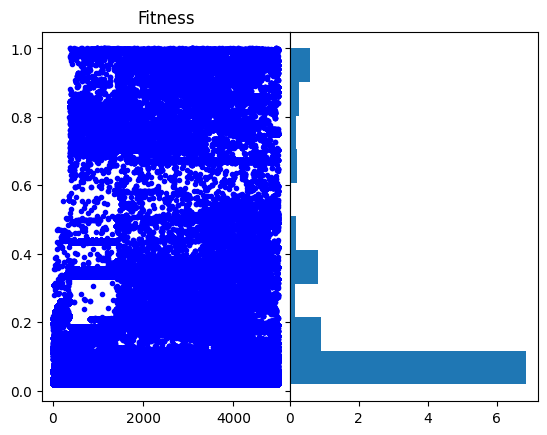

In [33]:
fig, ax = plt.subplots(1,2,sharey=True)
ax[0].plot(resultI["Generation"],resultI["Fitness"],".b")
ax[0].set_title("Fitness")
ax[1].hist(resultI["Fitness"],orientation="horizontal",density=True)
plt.subplots_adjust(wspace=0)
plt.show()

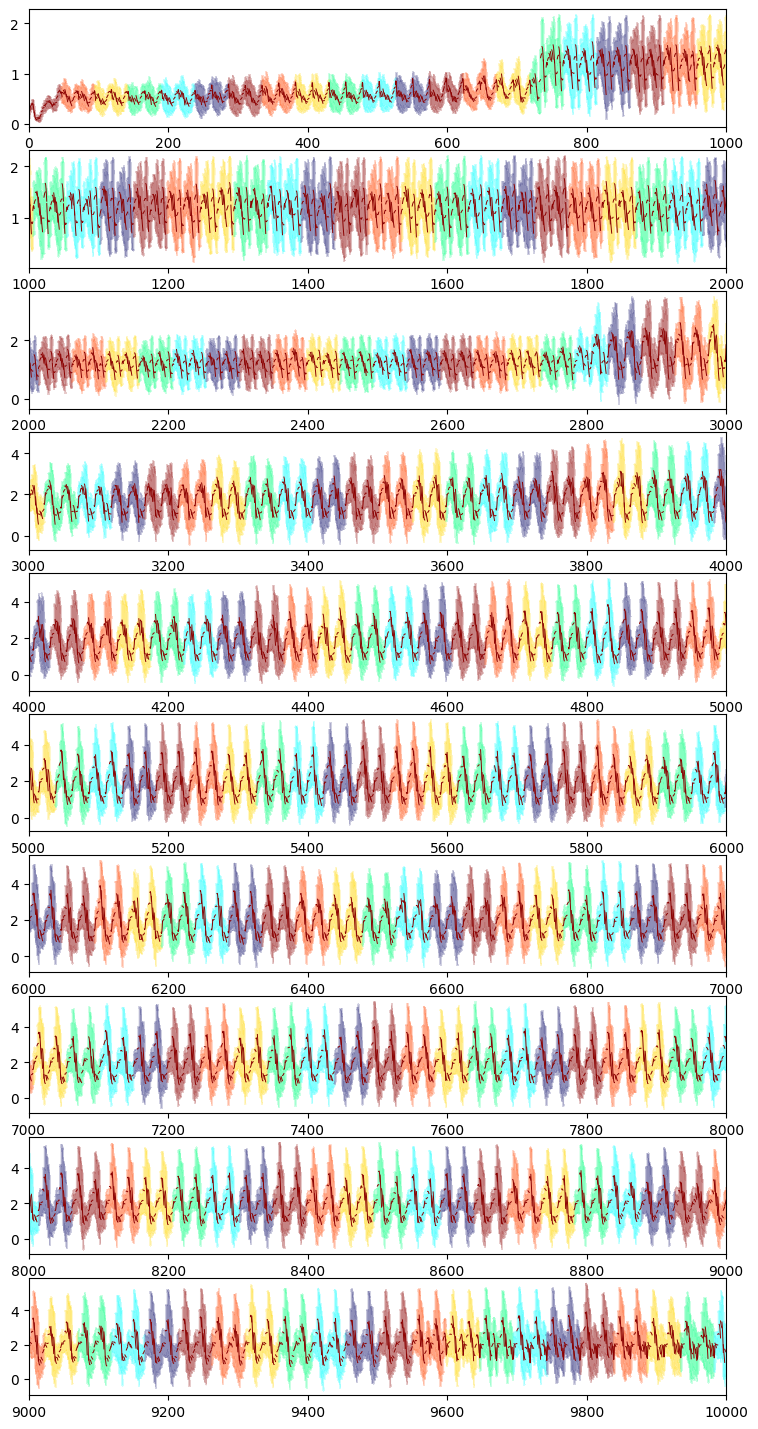

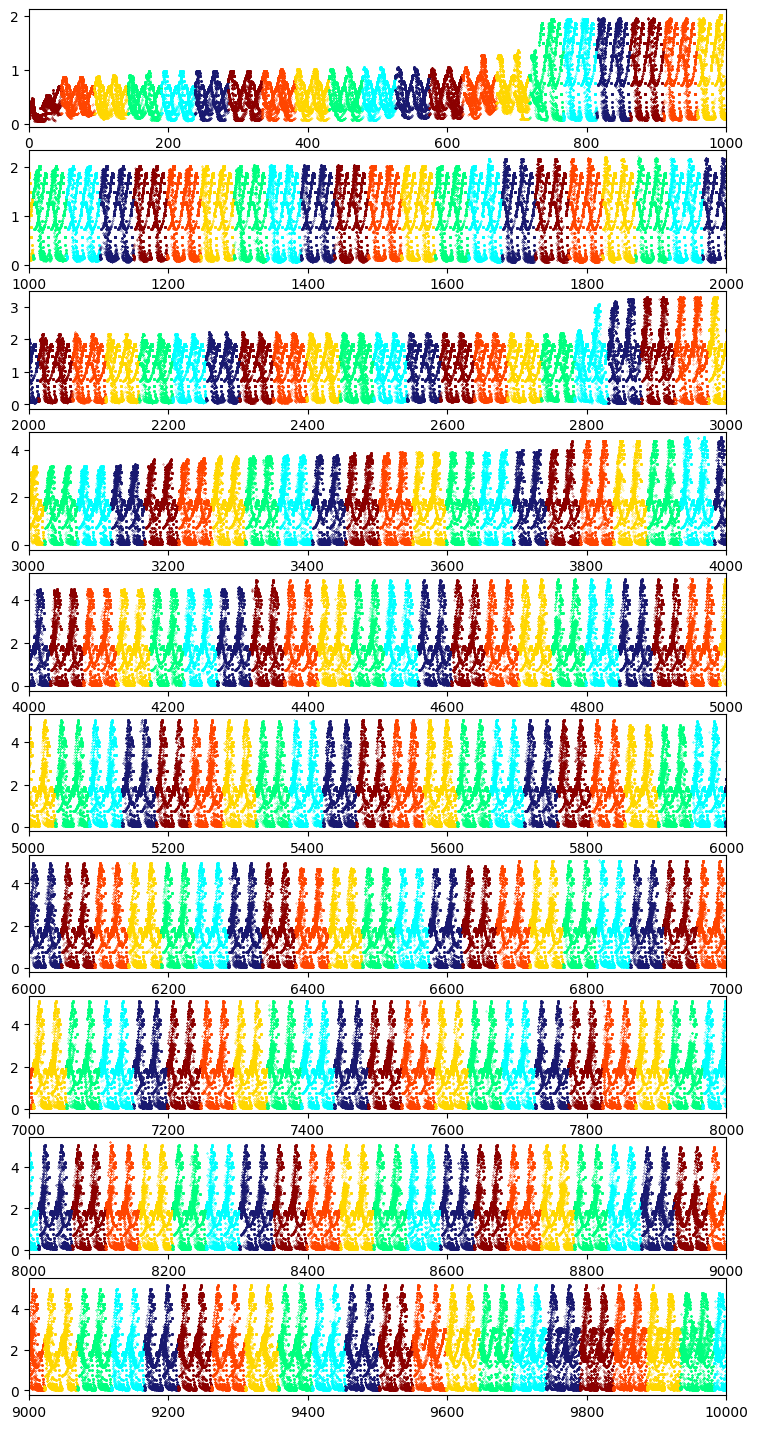

In [31]:
color=["darkred","orangered","gold","springgreen","cyan","midnightblue"]
fig1, ax1 = plt.subplots(10,figsize=(9,18))
fig2, ax2 = plt.subplots(10,figsize=(9,18))
count=500
for i in range(1,5001):
    x,y = list(rT[(i-1)*100:i*100]),list(rW[(i-1)*100:i*100])
    x,y = np.array(x).reshape(500),np.array(y).reshape(500)
    # fit a linear curve and estimate its y-values and their error.
    a,b,c = np.polyfit(x, y, deg=2)
    y_est = a*x**2 + b*x + c
    y_err = np.sqrt(np.sum((y - y_est)**2)/len(y))
    
    ax1[(i-1)//500].plot(pd.unique(x), pd.unique(y_est), '-',color="darkred",
                         linewidth=0.7)#markersize=.5)
    ax1[(i-1)//500].fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2,color=color[i//24%6])
    ax2[(i-1)//500].plot(x, y, '.', color=color[i//24%6],markersize=.5)
    
    if count==i:
        ax1[(i-1)//500].set_xlim((i-500)*2,i*2)
        ax2[(i-1)//500].set_xlim((i-500)*2,i*2)
        count += 500
    
plt.show()


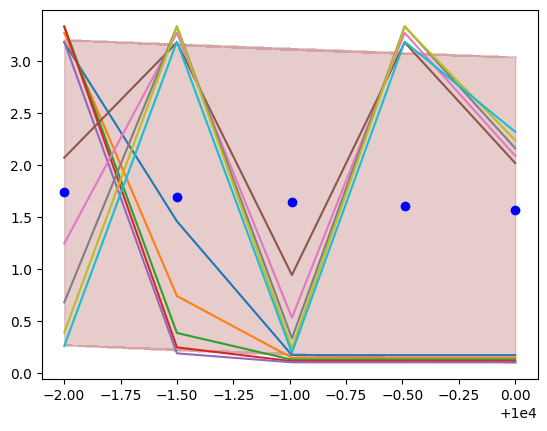

In [32]:
plt.plot(pd.unique(x),y.reshape(5,100)[:,-20:-10],"-")
plt.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2,color=color[1//24%6])
plt.plot(pd.unique(x),pd.unique(y_est),"ob")
plt.show()

In [7]:
#time=np.linspace(0,48,96)
#amp = (11-1.5)/2
#yd = 1.5 + amp
#WCCopt = yd + amp*(np.cos(2*np.pi*(time+12)/24))
#plt.plot(WCCopt)
#plt.show()

In [ ]:
ERkI = [[0]*23]
for k in resultI["Expresion and repression"]:
    ERkI = np.append(ERkI,np.mat(k)[0],axis=0)
ERkI = ERkI[1:,:]

DkmI = [[0]*7]
for km in resultI["Disociation constants"]:
    DkmI = np.append(DkmI,np.array(np.mat(km)),axis=0)
DkmI = DkmI[1:,:]

nHI = [[0]*4]
for n in resultI["Hill exponents"]:
    nHI = np.append(nHI,np.mat(n)[0],axis=0)
nHI = nHI[1:]

In [27]:
len(ERkI)

288328

In [ ]:
for i in range(0,23):
    if not i in [7,8,9,10,12,16,17,18,19,21,22]:
        plt.plot(ERkI[:,i],'.',color="lightcoral")
        plt.hist(ERkI[:,i],orientation="horizontal")
        plt.title("k{}".format(i))
        #plt.savefig("Result/k{}_u0.03_M1.1_st600_N1000_v0.2_LD0_alg0_0.jpg".format(i))
        plt.show()

In [ ]:
for i in range(0,7):
    plt.plot(DkmI[:,i],'.',color="indigo")
    plt.hist(DkmI[:,i],orientation="horizontal")
    plt.title("KM{}".format(i))
    #plt.savefig("Result/k{}_u0.03_M1.1_st600_N1000_v0.2_LD0_alg0_0.jpg".format(i))
    plt.show()

In [ ]:
for i in range(0,4):
    plt.plot(nHI[:,i],'.',color="orangered")
    plt.hist(nHI[:,i],orientation="horizontal")
    plt.title("Hill exponent {}".format(i))
    #plt.savefig("Result/k{}_u0.03_M1.1_st600_N1000_v0.2_LD0_alg0_0.jpg".format(i))
    plt.show()

In [4]:
resultA = pd.read_csv("Result/AveGenSub"+files)

resultA

Unnamed: 0  Generation  \
0              0         1.0   
1              1         2.0   
2              2         3.0   
3              3         4.0   
4              4         5.0   
...          ...         ...   
4995        4995      4996.0   
4996        4996      4997.0   
4997        4997      4998.0   
4998        4998      4999.0   
4999        4999      5000.0   

                     Expresion and repression constants  \
0     [1.12246589e+00 1.29941824e+00 9.47180336e+01 ...   
1     [1.12814604e+00 1.30136010e+00 9.40676528e+01 ...   
2     [1.12738280e+00 1.30150300e+00 9.41435948e+01 ...   
3     [1.12517356e+00 1.30088563e+00 9.44093594e+01 ...   
4     [1.12345426e+00 1.30049606e+00 9.46029790e+01 ...   
...                                                 ...   
4995  [9.09428334e-01 1.32370472e+00 1.04608473e+02 ...   
4996  [9.12235560e-01 1.32034167e+00 1.04948388e+02 ...   
4997  [9.14388675e-01 1.31764225e+00 1.05235722e+02 ...   
4998  [9.14723992e-01 1.31713064e+00 1.05670557e+02 ...   
4999  [8.98481928e-01 1.33831828e+00 1.03537389e+02 ...   

      Constant of light rate  \
0                   0.100003   
1                   0.100000   
2                   0.099997   
3                   0.099994   
4                   0.099997   
...                      ...   
4995                0.076011   
4996                0.075974   
4997                0.076002   
4998                0.076486   
4999                0.076360   

                                  Disociation constants  \
0     [0.03       0.28999495 0.0487435  4.86938041 1...   
1     [0.02999783 0.289983   0.0481283  4.87381558 1...   
2     [0.02999738 0.289983   0.0480107  4.89659308 1...   
3     [0.02999919 0.289983   0.0480879  4.9104966  1...   
4     [0.02999999 0.2899717  0.04837288 4.89711831 1...   
...                                                 ...   
4995  [0.0273989  0.31860368 0.0427755  4.62918334 4...   
4996  [0.02731846 0.31891887 0.04288031 4.62934014 5...   
4997  [0.02725865 0.3191846  0.04284983 4.62982658 5...   
4998  [0.02728975 0.31905159 0.04238966 4.62925366 5...   
4999  [0.02836914 0.31453775 0.04226264 4.61161402 4...   

                                         Hill exponents       WCC   Fitness  
0         [1.99543956 1.89590777 2.80008267 2.49989712]  0.213894  0.132502  
1         [1.98112029 1.8816386  2.79993469 2.49985457]  0.346648  0.083130  
2         [2.00356304 1.88189944 2.79990157 2.49990179]  0.394078  0.045622  
3         [2.02666631 1.883852   2.80004735 2.49986286]  0.315320  0.028691  
4         [2.02004581 1.8893135  2.80031276 2.5002066 ]  0.154862  0.021189  
...                                                 ...       ...       ...  
4995  [ 2.37834131  1.81345751 10.78543784  2.5880372 ]  2.559657  0.083359  
4996  [ 2.32001595  1.81166698 11.09073177  2.59863208]  2.247372  0.041147  
4997  [ 2.26795349  1.81000904 11.046519    2.60820998]  2.275429  0.032569  
4998  [ 2.2284043   1.8141262  10.91244101  2.64228447]  1.684918  0.027219  
4999  [ 2.37471954  1.89499738 10.78313964  2.60105627]  1.441833  0.031302  

[5000 rows x 8 columns]

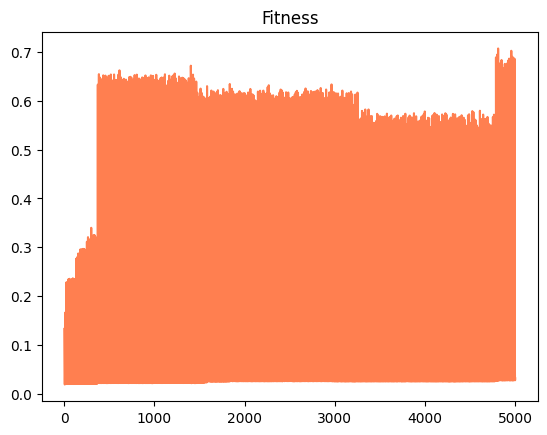

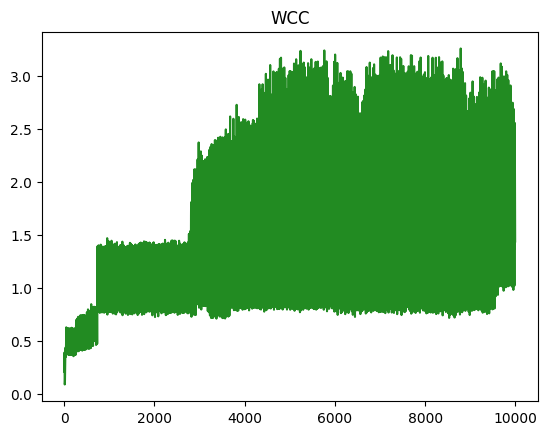

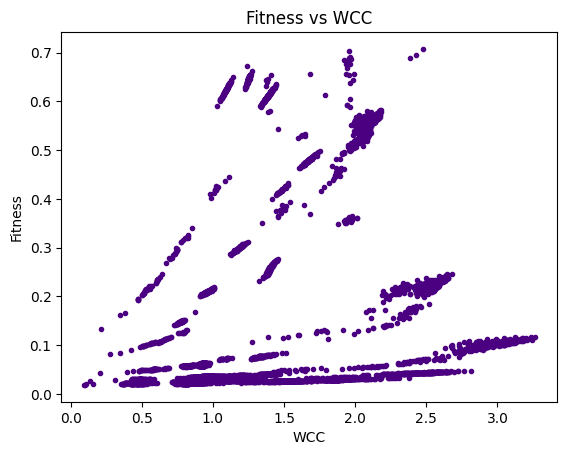

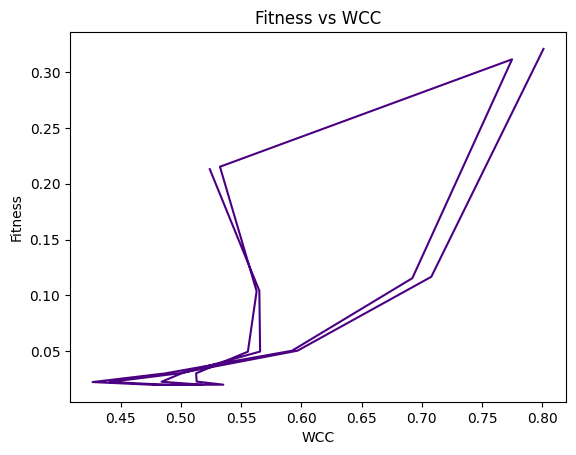

In [5]:
plt.figure()
plt.plot(resultA["Generation"],resultA["Fitness"],'-',color='coral')
#plt.vlines(range(0,len(resultA["Fitness"]),24),0,max(resultA["Fitness"]))
plt.title("Fitness")
#plt.xlim([0,5000])
#plt.savefig("Result/Light_u0.03_M1.1_st600_N1000_v0.2_LD0_alg0_0.jpg")
plt.show()

plt.figure()
plt.plot(range(0,len(resultA["WCC"])*2,2),resultA["WCC"],'-',color='forestgreen')
#plt.vlines(range(0,len(resultA["WCC"])*2,48),0,max(resultA["WCC"]))
plt.title("WCC")
#plt.xlim([0,10000])
#plt.savefig("Result/Light_u0.03_M1.1_st600_N1000_v0.2_LD0_alg0_0.jpg")
plt.show()

plt.figure()
plt.plot(resultA["WCC"],resultA["Fitness"],'.',color='indigo')
plt.title("Fitness vs WCC")
plt.xlabel("WCC")
plt.ylabel("Fitness")
plt.show()

plt.figure()
plt.plot(resultA["WCC"][240:264],resultA["Fitness"][240:264],'-',color='indigo')
plt.title("Fitness vs WCC")
plt.xlabel("WCC")
plt.ylabel("Fitness")
plt.show()

In [ ]:
ax = plt.figure().add_subplot(projection='3d')
ax.bar3d(resultA["Generation"], resultA["WCC"],
         np.zeros_like(resultA["Fitness"]), 
         1, .1, resultA["Fitness"], shade = True, color="cyan")
ax.set_xlabel("Generations")
ax.set_ylabel("Concentration")
ax.set_zlabel("Fitness")
plt.show()

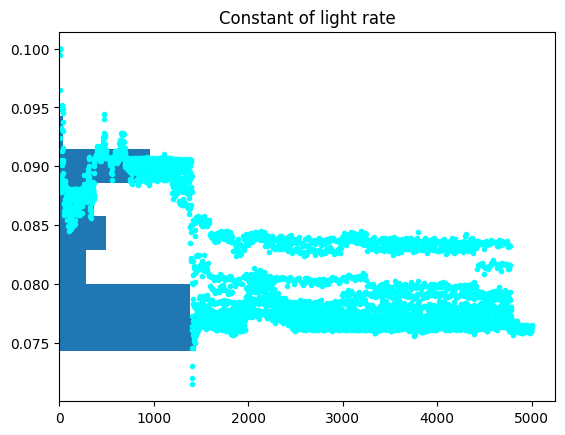

In [6]:
plt.plot(resultA["Constant of light rate"],".",color='cyan')
plt.hist(resultA["Constant of light rate"],orientation="horizontal")
plt.title("Constant of light rate")
#plt.savefig("Result/Light_u0.03_M1.1_st600_N1000_v0.2_LD0_alg0_0.jpg")
plt.show()

In [7]:
ERk = [[0]*23]
for k in resultA["Expresion and repression constants"]:
    ERk = np.append(ERk,np.mat(k)[0],axis=0)
ERk = ERk[1:,:]

Dkm = [[0]*7]
for km in resultA["Disociation constants"]:
    Dkm = np.append(Dkm,np.array(np.mat(km)),axis=0)
Dkm = Dkm[1:,:]

nH = [[0]*4]
for n in resultA["Hill exponents"]:
    nH = np.append(nH,np.mat(n)[0],axis=0)
nH = nH[1:]

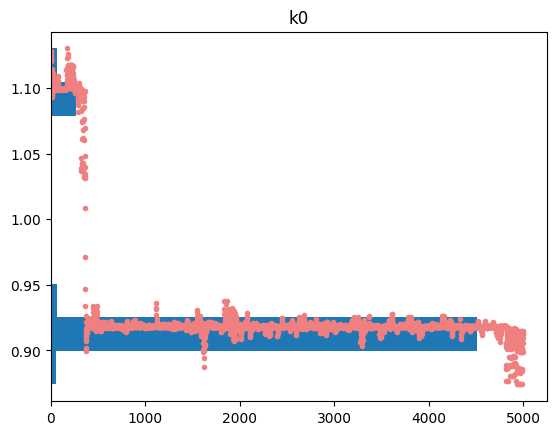

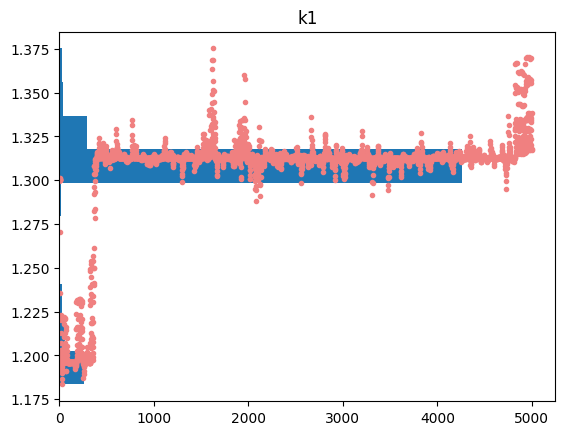

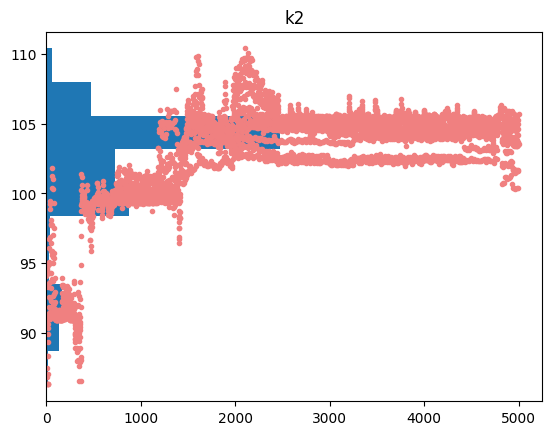

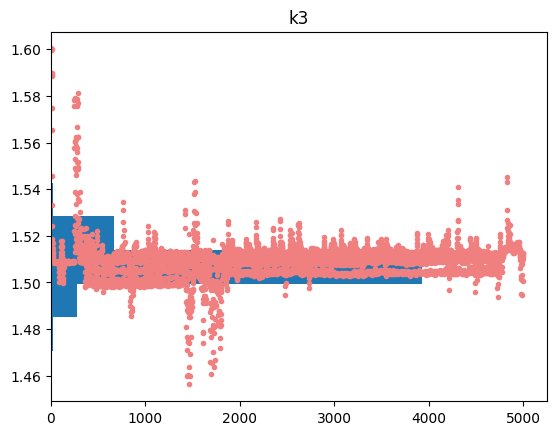

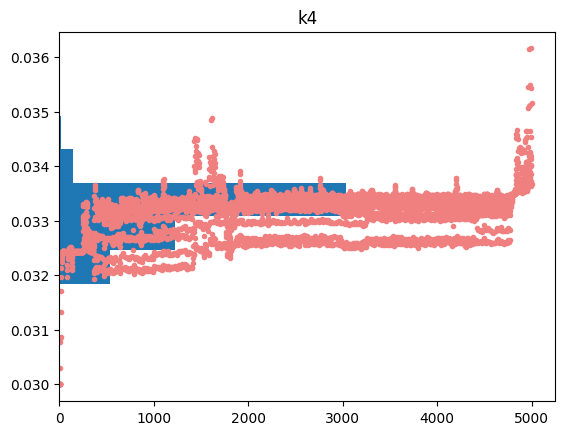

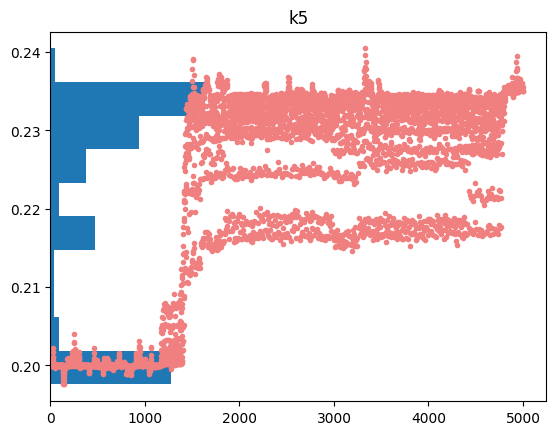

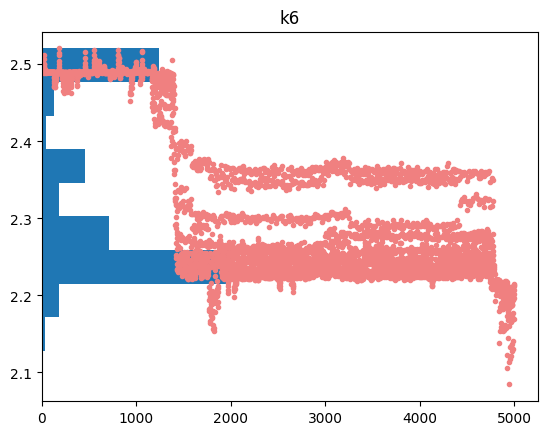

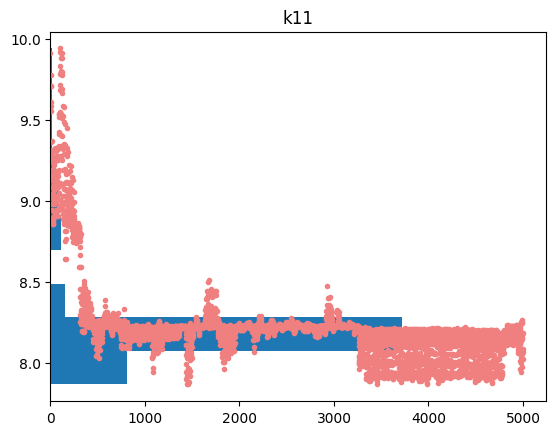

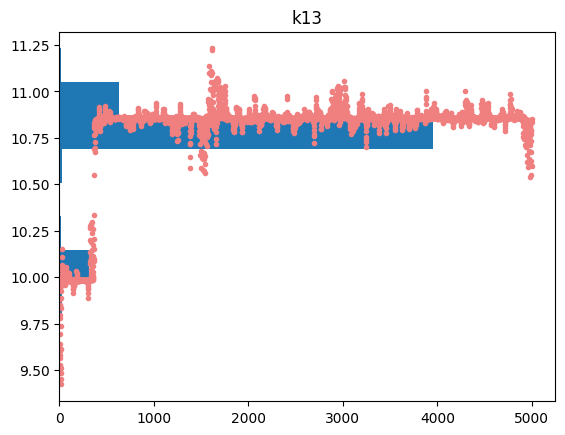

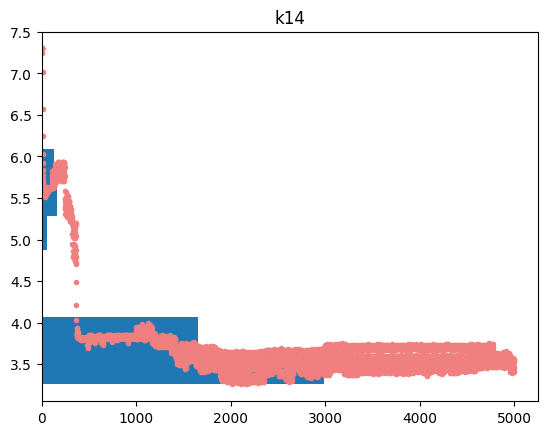

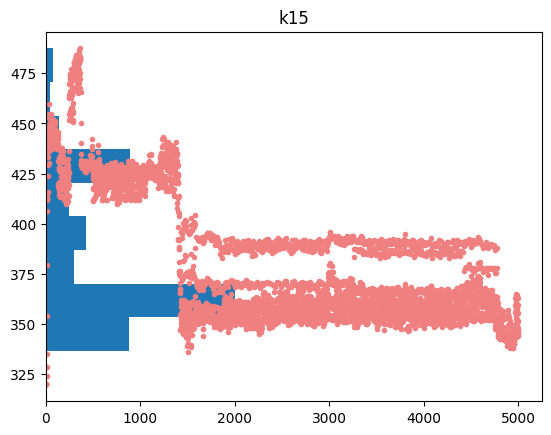

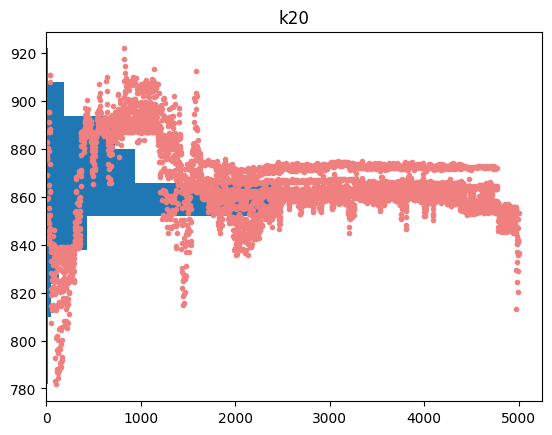

In [8]:
for i in range(0,23):
    if not i in [7,8,9,10,12,16,17,18,19,21,22]:
        plt.plot(ERk[:,i],'.',color="lightcoral")
        plt.hist(ERk[:,i],orientation="horizontal")
        plt.title("k{}".format(i))
        #plt.savefig("Result/k{}_u0.03_M1.1_st600_N1000_v0.2_LD0_alg0_0.jpg".format(i))
        plt.show()

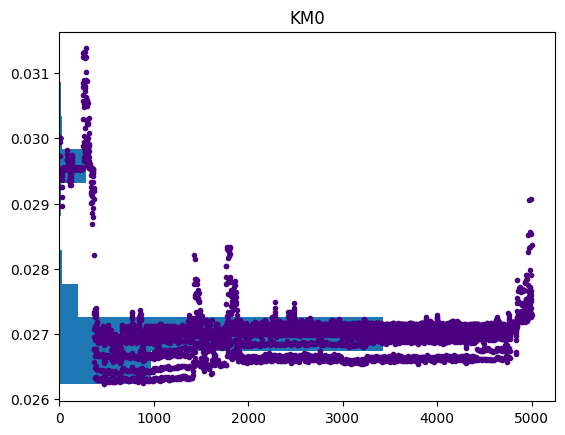

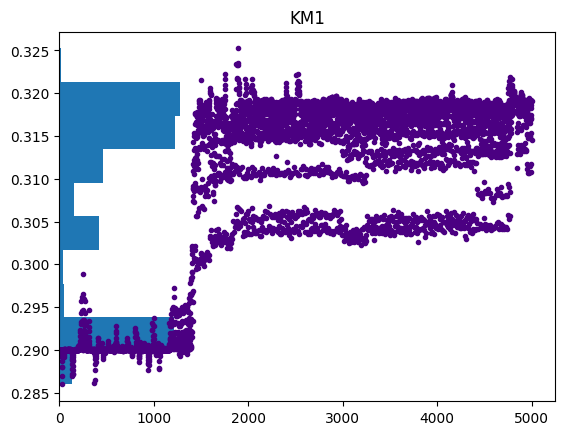

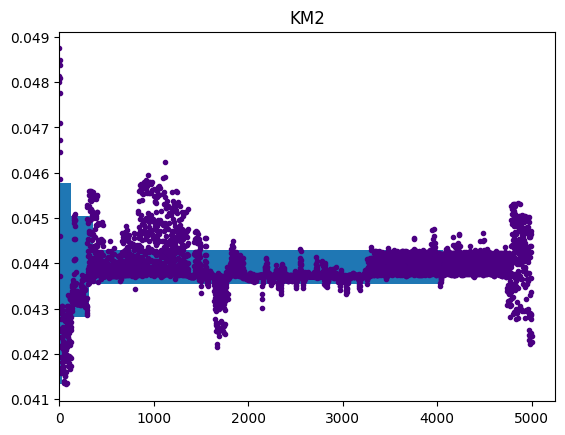

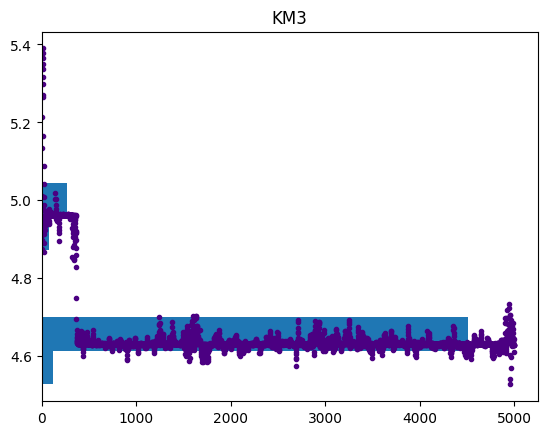

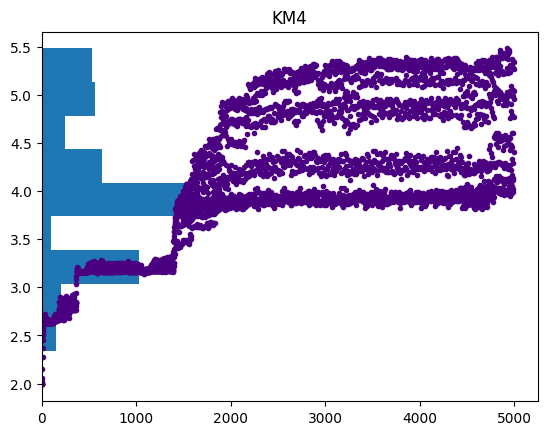

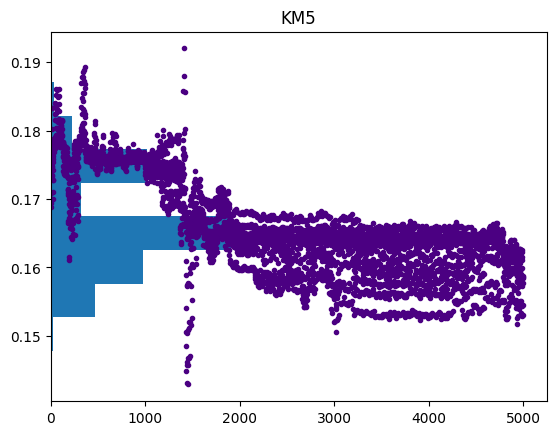

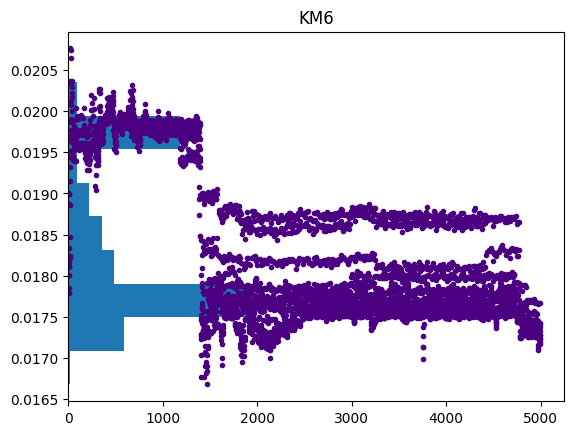

In [9]:
for i in range(0,7):
    plt.plot(Dkm[:,i],'.',color="indigo")
    plt.hist(Dkm[:,i],orientation="horizontal")
    plt.title("KM{}".format(i))
    #plt.savefig("Result/k{}_u0.03_M1.1_st600_N1000_v0.2_LD0_alg0_0.jpg".format(i))
    plt.show()

In [10]:
from scipy import stats
def normalidad_variable_numerica(col):
    stats.probplot(resultA[col], plot=plt)
    plt.xlabel('Diagrama de Probabilidad(normal) de la variable {}'.format(col))
    plt.show()

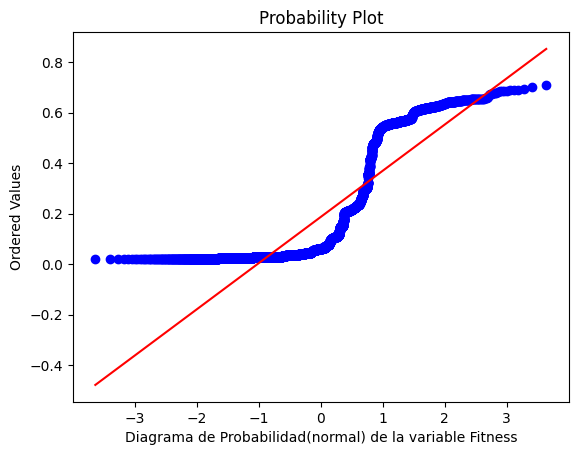

In [11]:
normalidad_variable_numerica("Fitness")

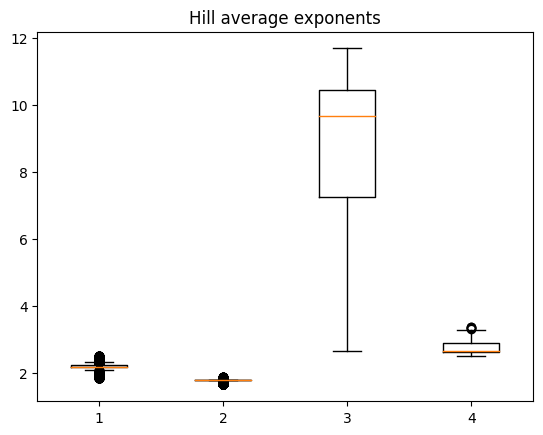

In [12]:
plt.boxplot(nH)
plt.title("Hill average exponents")
#plt.savefig("Result/Hillexp_u0.03_M1.1_st600_N1000_v0.2_LD0_alg0_0.jpg")
plt.show()

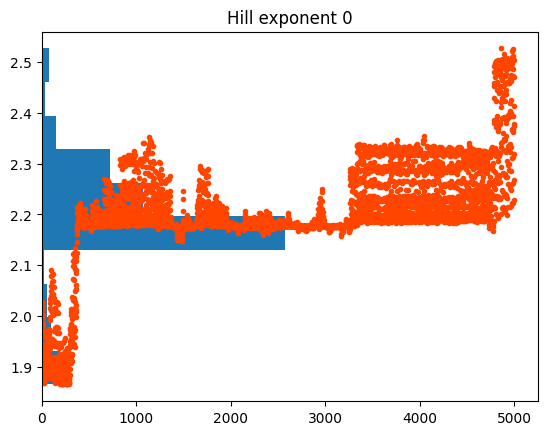

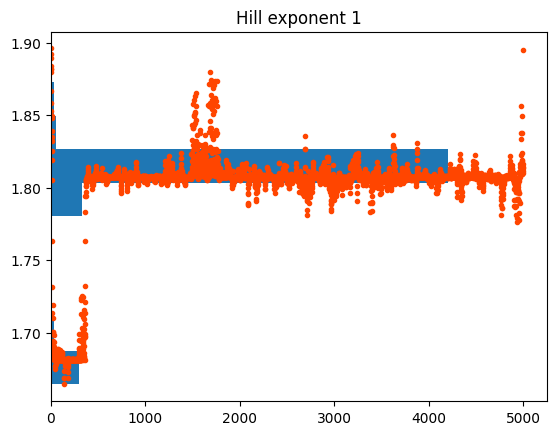

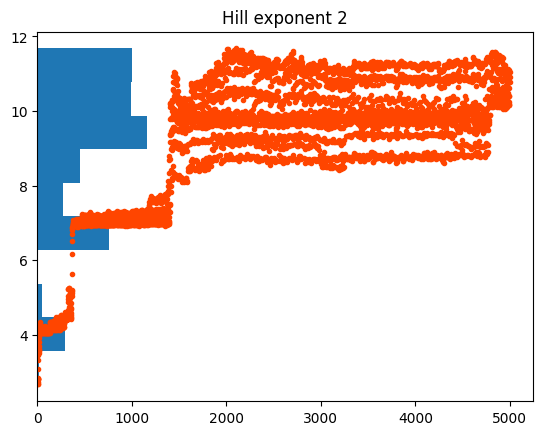

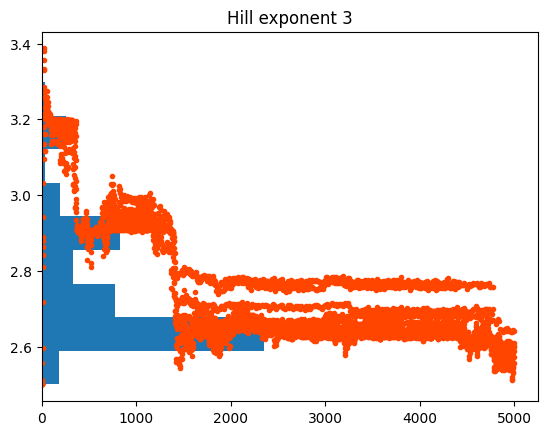

In [13]:
for i in range(0,4):
    plt.plot(nH[:,i],'.',color="orangered")
    plt.hist(nH[:,i],orientation="horizontal")
    plt.title("Hill exponent {}".format(i))
    #plt.savefig("Result/k{}_u0.03_M1.1_st600_N1000_v0.2_LD0_alg0_0.jpg".format(i))
    plt.show()

In [14]:
resultL = pd.read_csv("Result/LineagexCycle"+files)

resultL

Unnamed: 0  Generation  LTag  LMut      LFit  \
0                0         0.0     0     0  0.000132   
1                1         0.0     1     0  0.000132   
2                2         0.0     2     0  0.000132   
3                3         0.0   358     6  0.000147   
4                4         0.0     4     0  0.000132   
...            ...         ...   ...   ...       ...   
208995      208995      4992.0   810     0  0.006201   
208996      208996      4992.0   810     0  0.006201   
208997      208997      4992.0   356     0  0.003981   
208998      208998      4992.0   348     0  0.006201   
208999      208999      4992.0   941     0  0.004202   

                                 Expresion and repression  \
0       [1.12, 1.3, 95, 1.6, 0.03, 0.2, 2.49, 2, 0.472...   
1       [1.12, 1.3, 95, 1.6, 0.03, 0.2, 2.49, 2, 0.472...   
2       [1.12, 1.3, 95, 1.6, 0.03, 0.2, 2.49, 2, 0.472...   
3       [1.14677736e+00 1.31279406e+00 9.19320169e+01 ...   
4       [1.12, 1.3, 95, 1.6, 0.03, 0.2, 2.49, 2, 0.472...   
...                                                   ...   
208995  [9.18236260e-01 1.31272389e+00 1.05612953e+02 ...   
208996  [9.18236260e-01 1.31272389e+00 1.05612953e+02 ...   
208997  [9.18236260e-01 1.31272389e+00 1.05612953e+02 ...   
208998  [9.18236260e-01 1.31272389e+00 1.05612953e+02 ...   
208999  [9.18236260e-01 1.31272389e+00 1.07935415e+02 ...   

        Constant of light rate  \
0                     0.100000   
1                     0.100000   
2                     0.100000   
3                     0.100000   
4                     0.100000   
...                        ...   
208995                0.075937   
208996                0.075937   
208997                0.075937   
208998                0.075937   
208999                0.078696   

                                    Disociation Constants  \
0            [0.03, 0.29, 0.049, 4.86, 1.99, 0.17, 0.019]   
1            [0.03, 0.29, 0.049, 4.86, 1.99, 0.17, 0.019]   
2            [0.03, 0.29, 0.049, 4.86, 1.99, 0.17, 0.019]   
3       [0.03       0.29       0.04607328 4.7965631  1...   
4            [0.03, 0.29, 0.049, 4.86, 1.99, 0.17, 0.019]   
...                                                   ...   
208995  [0.0271708  0.31949015 0.04576967 4.63129806 3...   
208996  [0.0271708  0.31949015 0.04576967 4.63129806 3...   
208997  [0.0271708  0.31949015 0.04372374 4.63129806 5...   
208998  [0.0271708  0.31949015 0.04576967 4.63129806 3...   
208999  [0.0271708  0.31949015 0.04147362 4.63129806 5...   

                                           Hill exponents  
0                                      [2, 1.9, 2.8, 2.5]  
1                                      [2, 1.9, 2.8, 2.5]  
2                                      [2, 1.9, 2.8, 2.5]  
3           [1.92217053 1.78959688 2.8        2.5       ]  
4                                      [2, 1.9, 2.8, 2.5]  
...                                                   ...  
208995  [ 2.55490639  1.807283   10.0698232   2.52307395]  
208996  [ 2.55490639  1.807283   10.0698232   2.52307395]  
208997  [ 2.17683511  1.807283   11.71635064  2.62063422]  
208998  [ 2.55490639  1.807283   10.0698232   2.52307395]  
208999  [ 2.12738286  1.807283   11.23183283  2.79523859]  

[209000 rows x 9 columns]

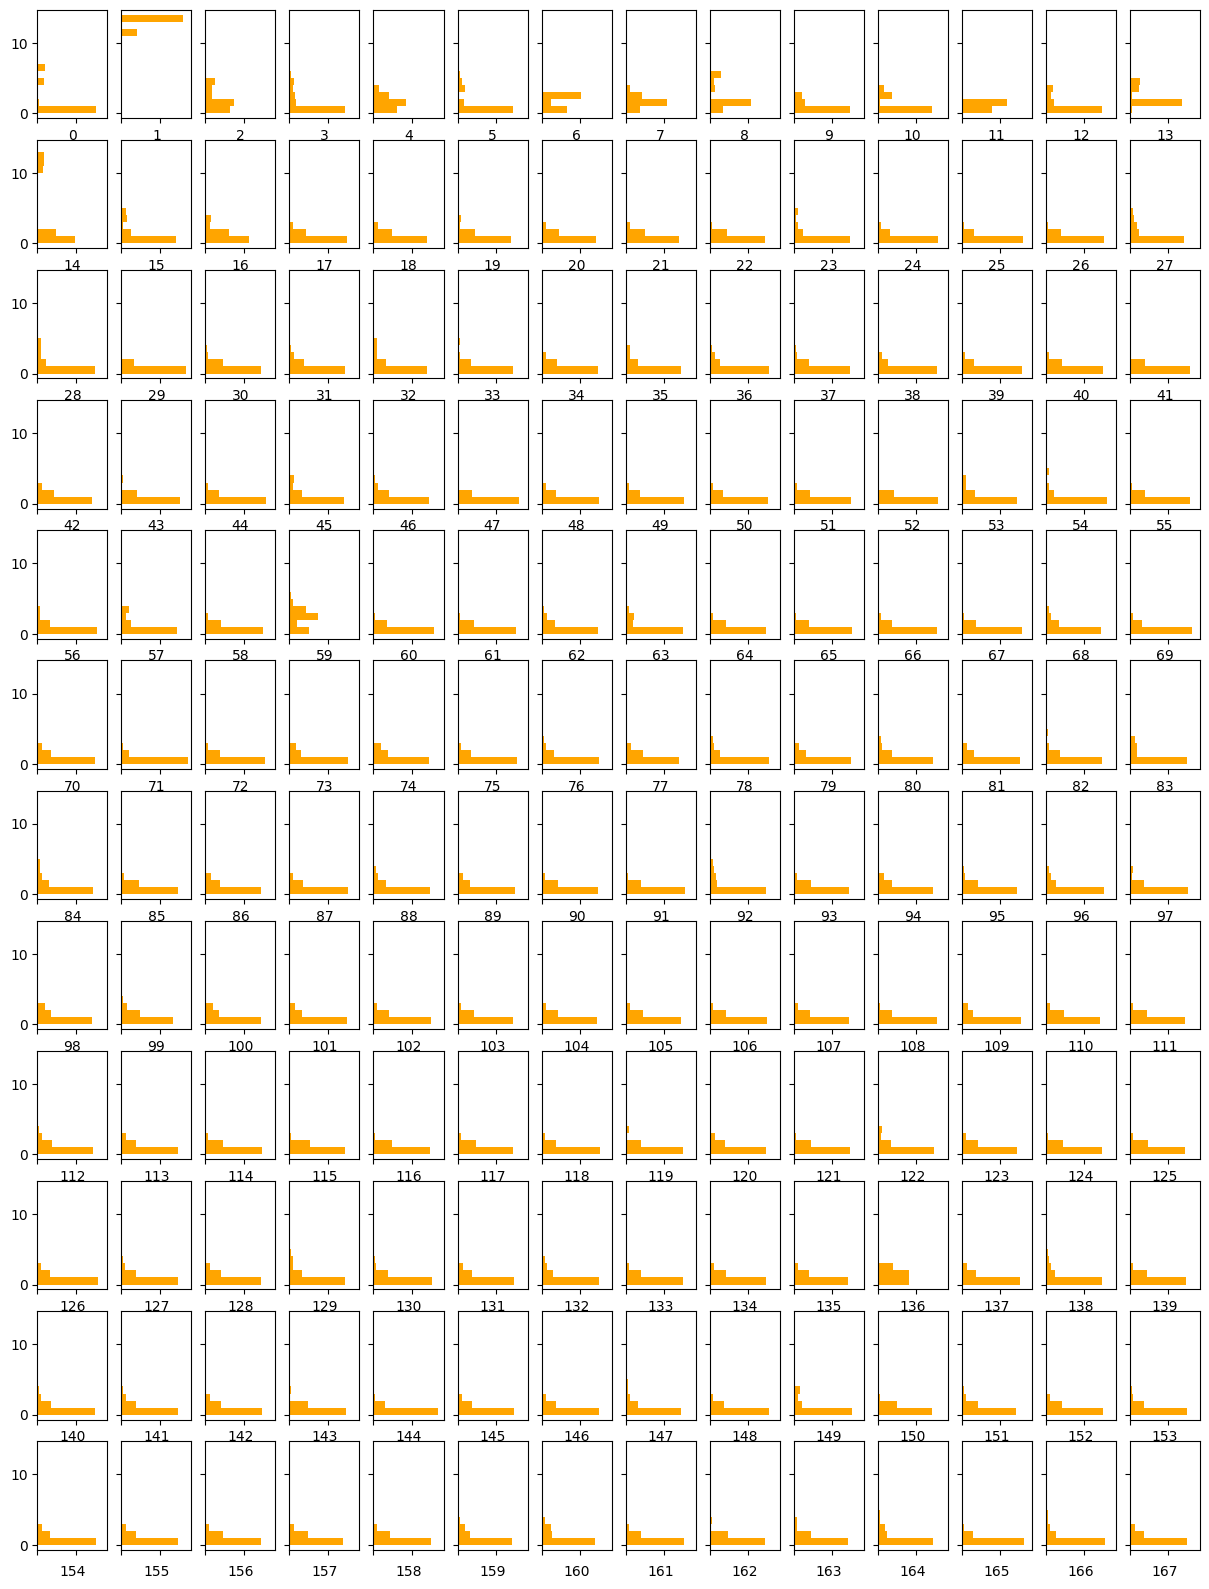

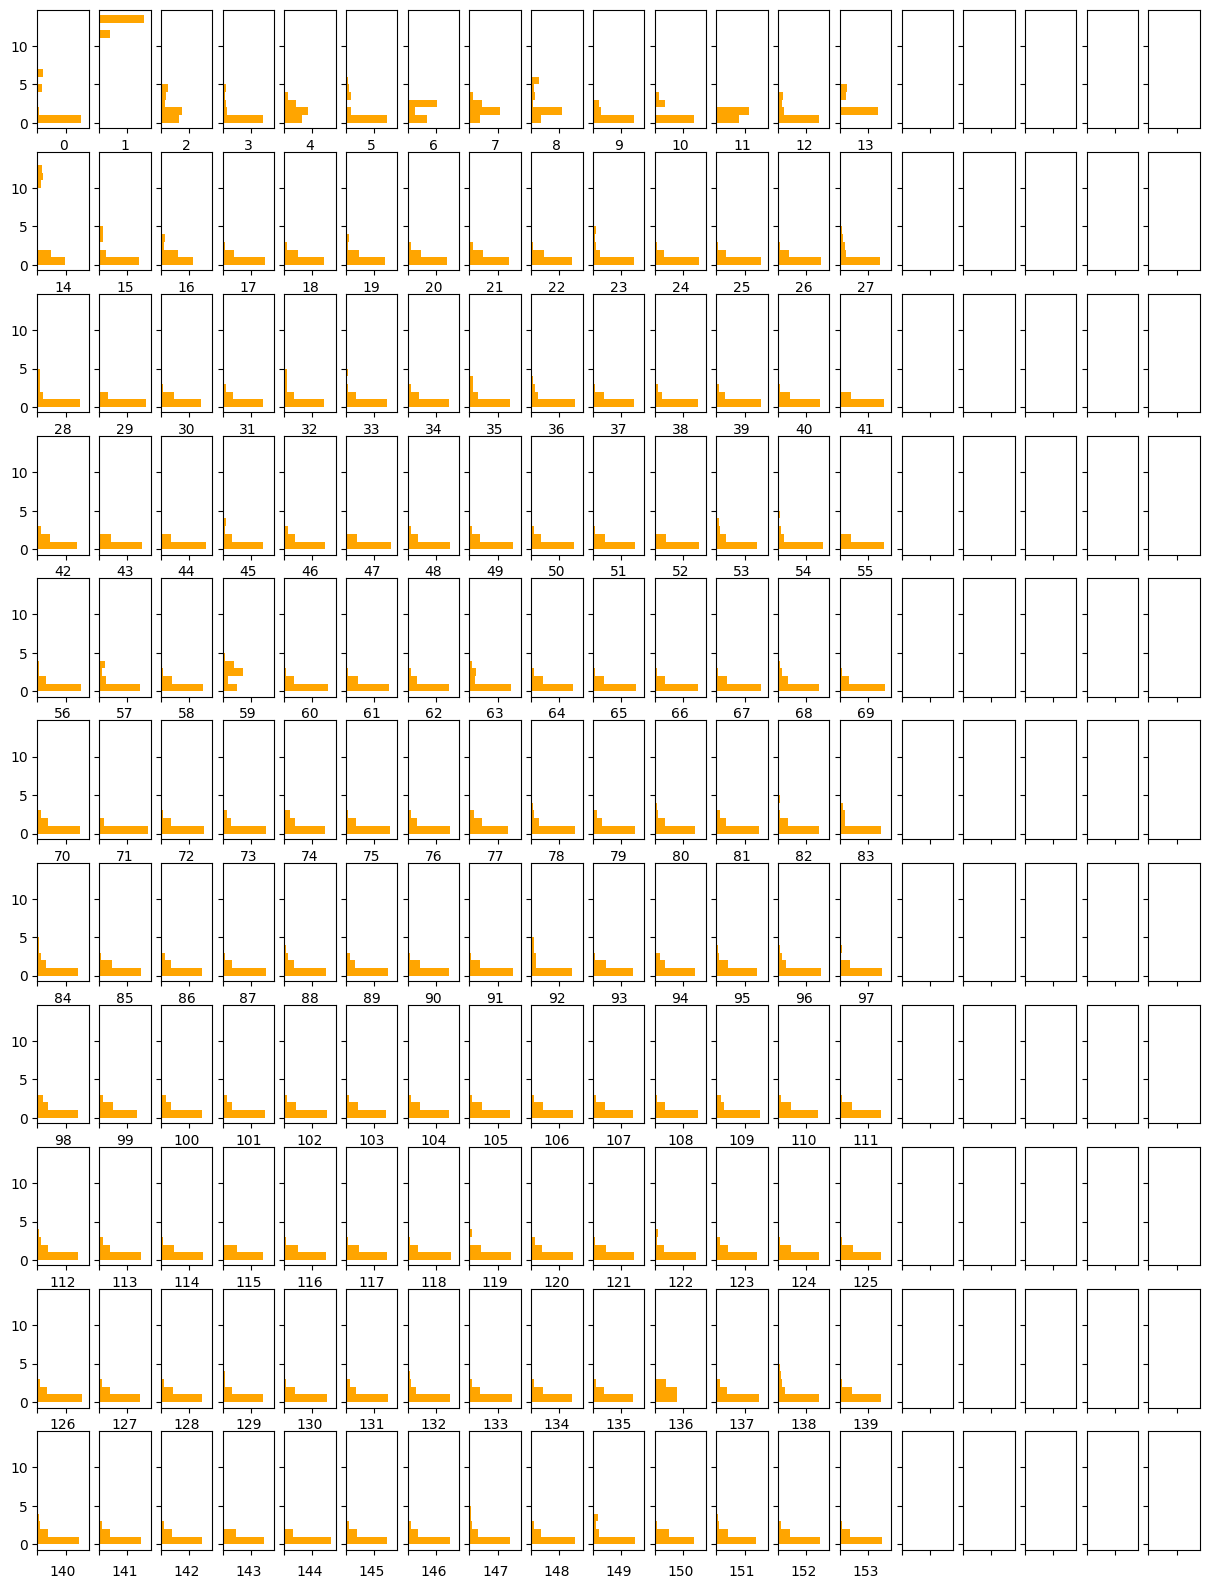

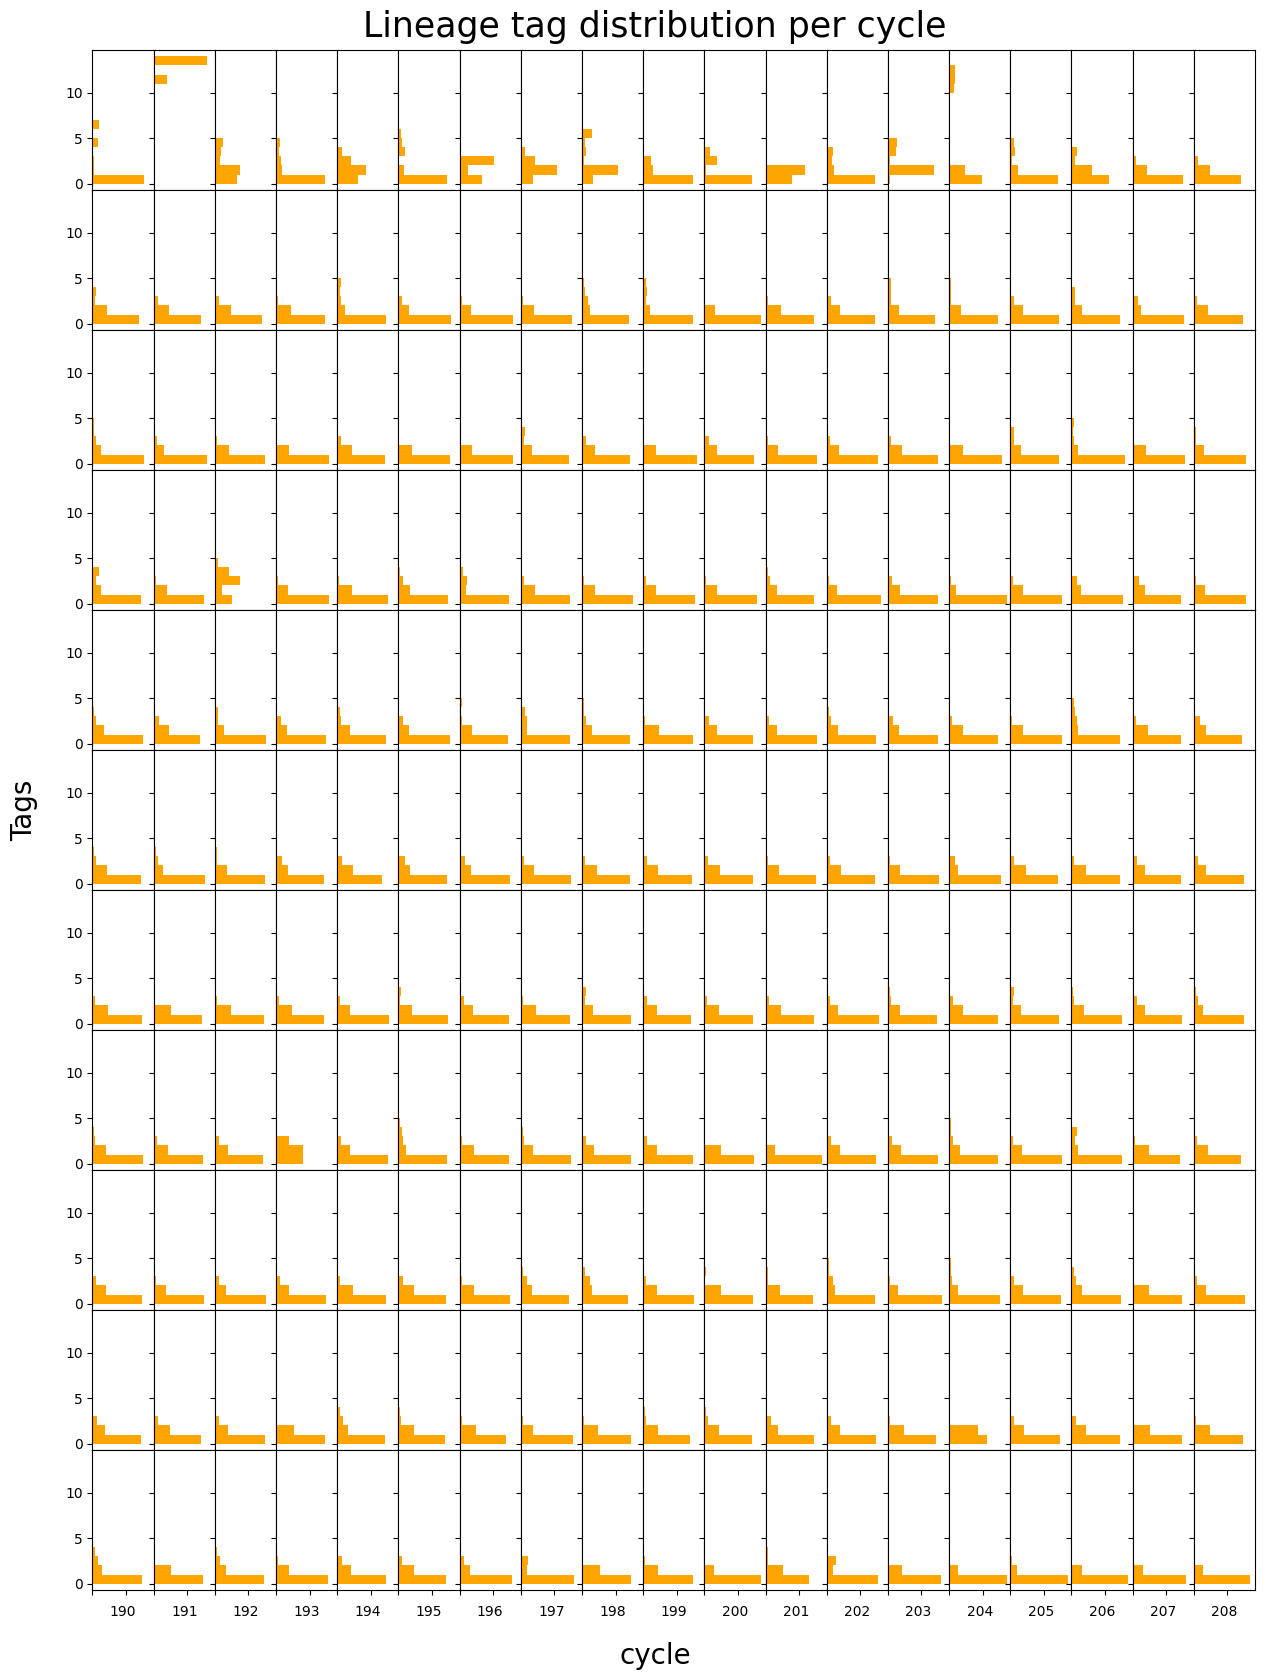

In [17]:
fig,ax =plt.subplots(11,19,sharey=True,sharex=True,figsize=(15,20))
for i in range(int(resultL["Generation"].max()/24) + 1):
    ax[i//19,i%19].hist(resultL["LMut"][i*1000:(i+1)*1000],
                        orientation = "horizontal",range=(0,14),
                        density=True,color="orange",alpha=1,bins=14)
    ax[i//19,i%19].set_xlabel(i)
    ax[i//19,i%19].set_xticklabels("")
    
plt.subplots_adjust(wspace=0,hspace=0)
fig.suptitle("Lineage tag distribution per cycle",position=(.5,.9),fontsize=25)
fig.supxlabel("cycle",position=(0.5,0.07),fontsize=20)
fig.supylabel("Tags",position=(0.07,.5),fontsize=20)
plt.show()

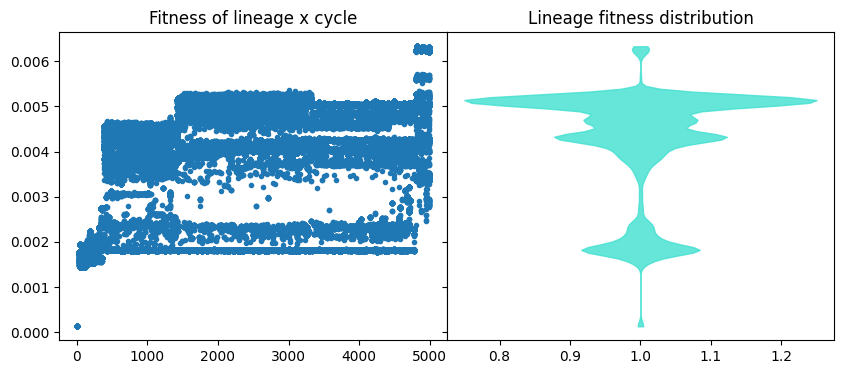

In [20]:
fig,ax = plt.subplots(1,2,sharey=True,figsize=(10,4))
ax[0].plot(resultL["Generation"],resultL["LFit"],".")
ax[0].set_title("Fitness of lineage x cycle")
vp=ax[1].violinplot(resultL["LFit"],showextrema=False)
for body in vp['bodies']:
    body.set_color("turquoise")
    body.set_alpha(0.8)
plt.title("Lineage fitness distribution")
plt.subplots_adjust(wspace=0)
plt.show()

In [ ]:
fig,ax = plt.subplots(1,2,sharey=True,figsize=(12,4))
ax[0].plot(resultL["Generation"],resultL["LTag"],".")
ax[0].set_title("Individual Lineage x cycle")
ax[1].hist(resultL["LTag"],orientation="horizontal", density = True,
           color="navy",alpha=0.7,bins=20)
#ax[1].set_xticks([0,0.0005,0.001,0.0015,0.002],labels=["0","0.0005","0.001","0.0015","0.002"])
plt.title("Lineage distribution")
plt.subplots_adjust(wspace=0.02)
plt.show()

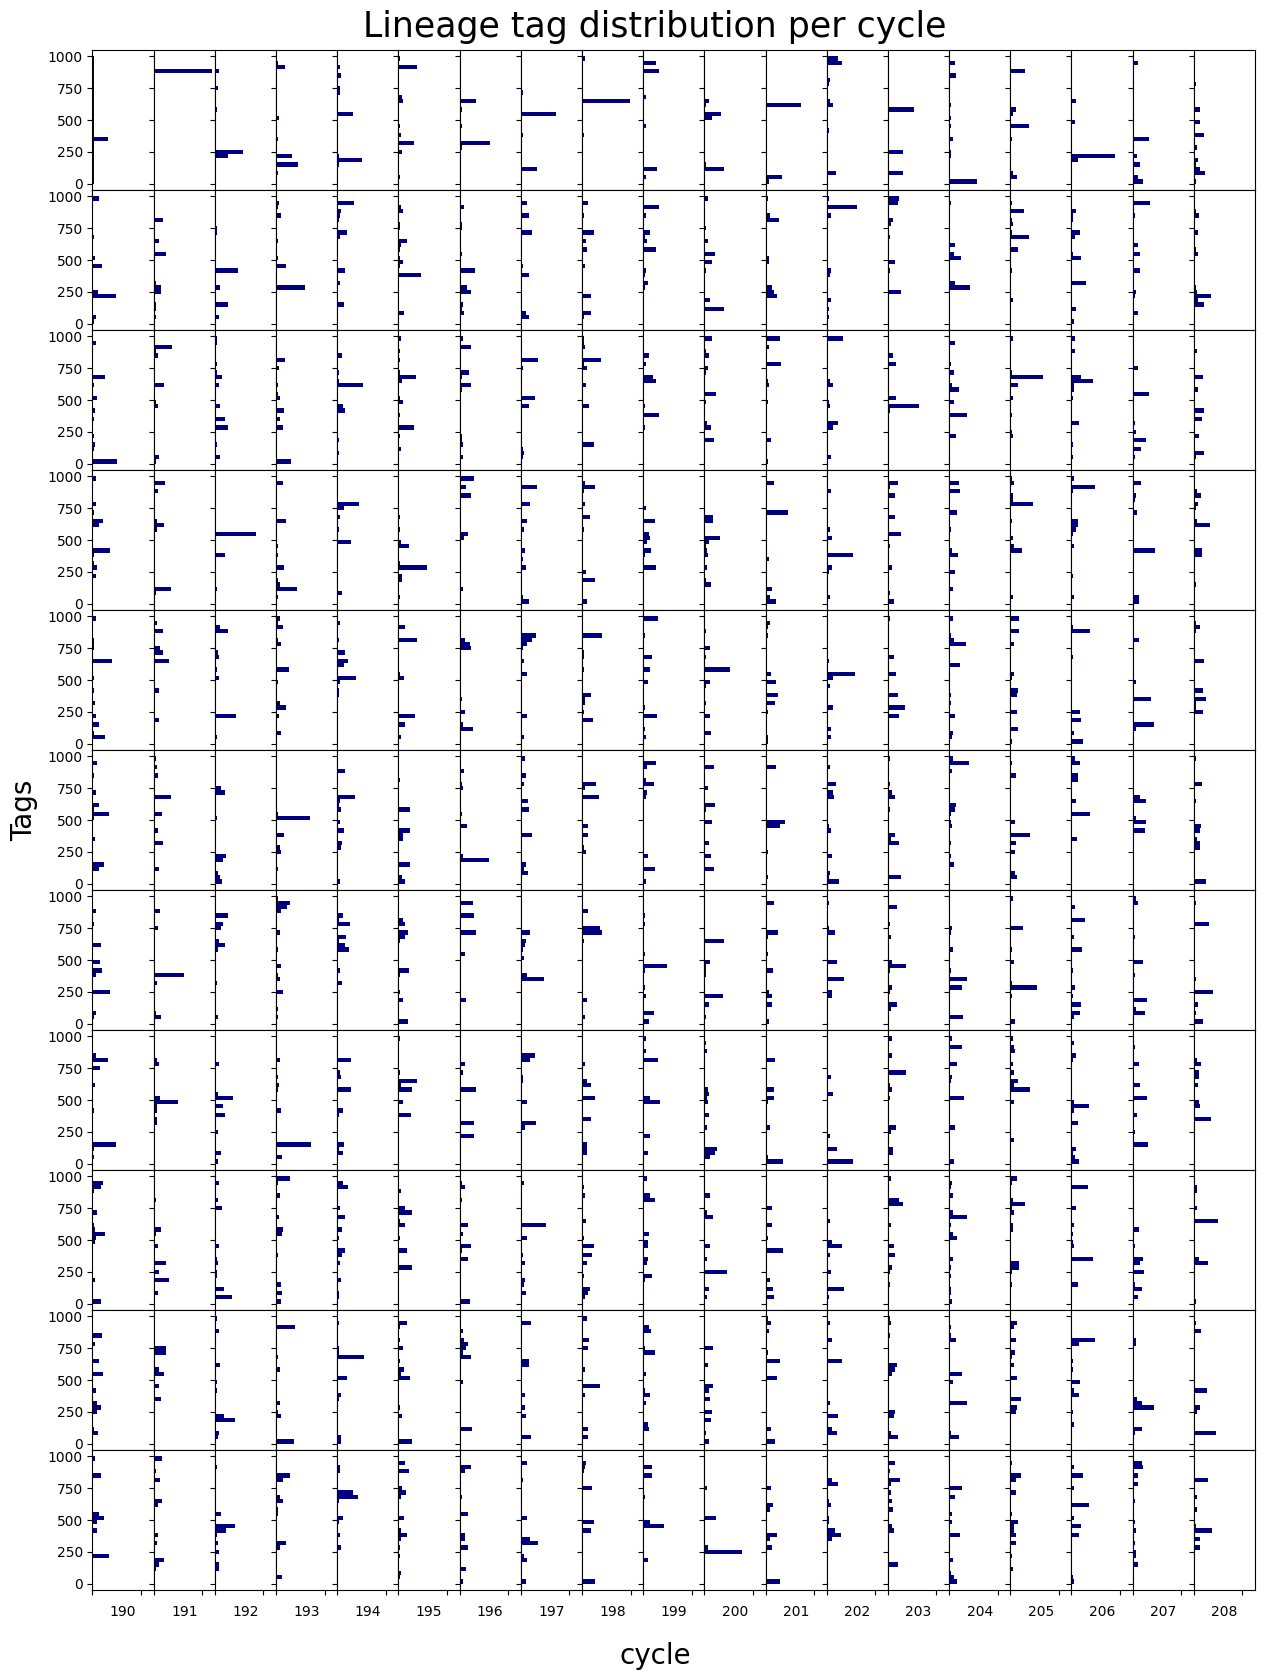

In [22]:
fig,ax =plt.subplots(11,19,sharey=True,sharex=True,figsize=(15,20))
for i in range(int(resultL["Generation"].max()/24) + 1):
    ax[i//19,i%19].hist(resultL["LTag"][i*1000:(i+1)*1000],
                        orientation = "horizontal",range=(0,1000),
                        density=True,color="navy",alpha=1,bins=30)
    ax[i//19,i%19].set_xlabel(i)
    ax[i//19,i%19].set_xticklabels("")
    
plt.subplots_adjust(wspace=0,hspace=0)
fig.suptitle("Lineage tag distribution per cycle",position=(.5,.9),fontsize=25)
fig.supxlabel("cycle",position=(0.5,0.07),fontsize=20)
fig.supylabel("Tags",position=(0.07,.5),fontsize=20)
plt.show()

In [23]:
ER = [[0]*23]
for k in resultL["Expresion and repression"]:
    ER = np.append(ER,np.mat(k)[0],axis=0)
ER = np.array(ER[1:,:])

Dk = [[0]*7]
for km in resultL["Disociation Constants"]:
    Dk = np.append(Dk,np.array(np.mat(km)),axis=0)
Dk = np.array(Dk[1:,:])

Hexp = [[0]*4]
for n in resultL["Hill exponents"]:
    Hexp = np.append(Hexp,np.mat(n)[0],axis=0)
Hexp = np.array(Hexp[1:])

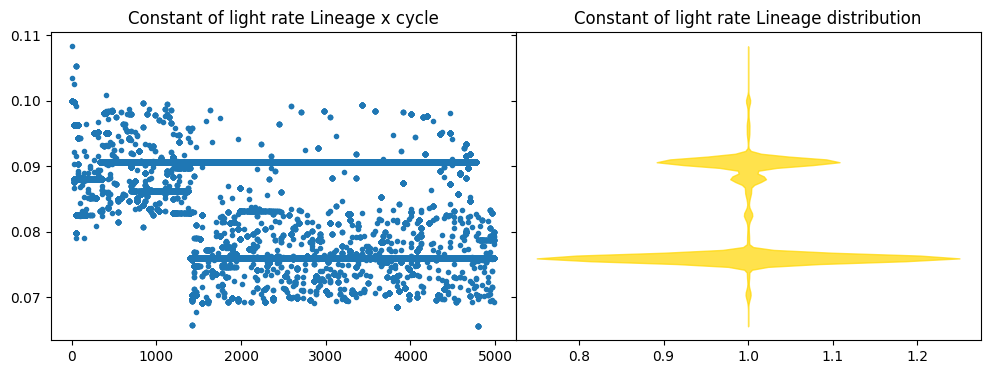

In [24]:
fig,ax = plt.subplots(1,2,sharey=True,figsize=(12,4))
ax[0].plot(resultL["Generation"],resultL["Constant of light rate"],".")
ax[0].set_title("Constant of light rate Lineage x cycle")
vp=ax[1].violinplot(resultL["Constant of light rate"],showextrema=False)
for body in vp['bodies']:
    body.set_color("gold")
    body.set_alpha(0.7)
plt.title("Constant of light rate Lineage distribution")
plt.subplots_adjust(wspace=0)
plt.show()

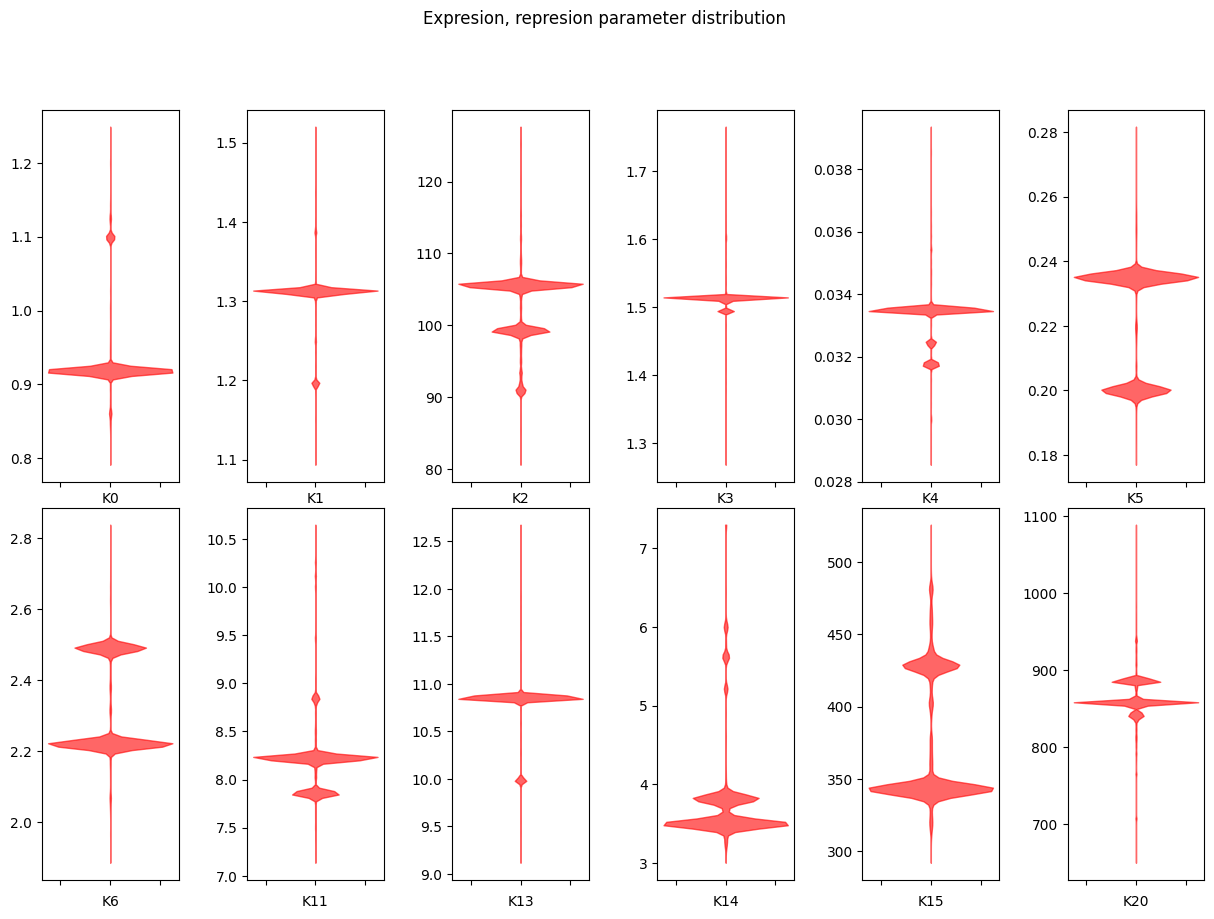

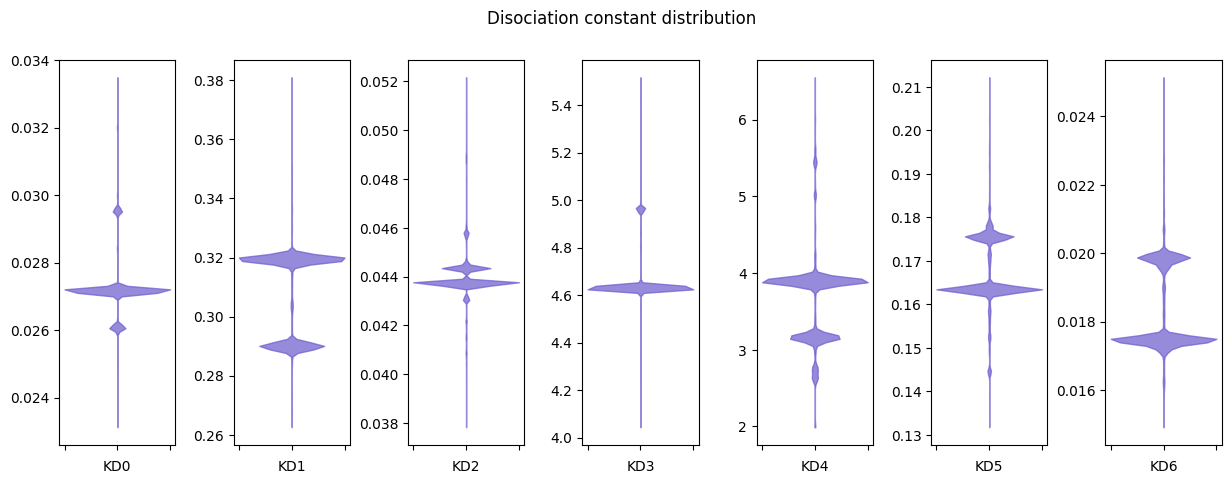

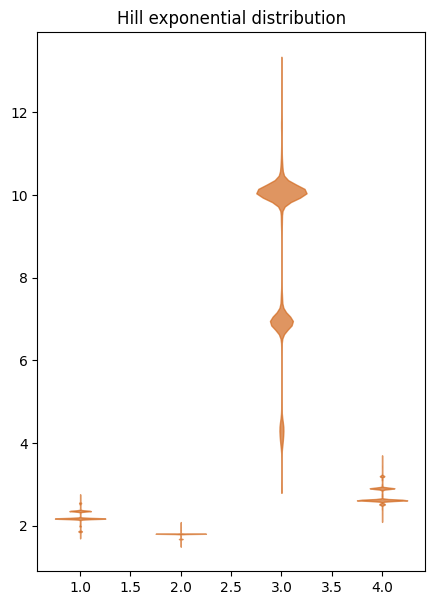

In [25]:
fig,ax=plt.subplots(2,6,figsize=(15,10),sharex=True)
for i,j in enumerate([0,1,2,3,4,5,6,11,13,14,15,20]):
    vp=ax[i//6,i%6].violinplot(ER[:,j],showextrema=False)
    vp['bodies'][0].set_color("red")
    vp['bodies'][0].set_alpha(0.6)
    ax[i//6,i%6].set_xticklabels("")
    ax[i//6,i%6].set_xlabel("K"+str(j))
plt.subplots_adjust(wspace=0.5,hspace=0.07)
fig.suptitle("Expresion, represion parameter distribution")
plt.show()

fig,ax=plt.subplots(1,7,figsize=(15,5),sharex=True)
for i in range(7):
    vp=ax[i].violinplot(Dk[:,i],showextrema=False)
    vp['bodies'][0].set_color("slateblue")
    vp['bodies'][0].set_alpha(0.7)
    ax[i].set_xticklabels("")
    ax[i].set_xlabel("KD"+str(i))
plt.subplots_adjust(wspace=0.5,hspace=0.07)
fig.suptitle("Disociation constant distribution")
plt.show()

fig,ax=plt.subplots(1,figsize=(5,7))
vp=ax.violinplot(Hexp,showextrema=False)
for body in vp['bodies']:
    body.set_color("chocolate")
    body.set_alpha(0.7)
plt.title("Hill exponential distribution")
plt.show()